## Pizza Place Sales
A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.

## Recommended Analysis
- How many customers do we have each day? Are there any peak hours?

- How many pizzas are typically in an order? Do we have any bestsellers?

- How much money did we make this year? Can we indentify any seasonality in the sales?

- Are there any pizzas we should take off the menu, or any promotions we could leverage?

In [1]:
## first import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
order = pd.read_csv('orders.csv')
order.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [4]:
order_details = pd.read_csv('order_details.csv')
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
pizza = pd.read_csv('pizzas.csv')
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [6]:
pizza_types = pd.read_csv('pizza_types.csv',encoding='latin')
pizza_types.head()      #had to add encoding=latin to remove the error

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [7]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [8]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [10]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [11]:
print(order.columns)
print(order_details.columns)
print(pizza.columns)
print(pizza_types.columns)

Index(['order_id', 'date', 'time'], dtype='object')
Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')
Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')
Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')


In [12]:
order.merge(order_details,on='order_id')

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1
...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1


In [13]:
order.merge(order_details,on='order_id').merge(pizza,on='pizza_id')

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25
...,...,...,...,...,...,...,...,...,...
48615,17492,2015-10-24,18:58:20,39733,the_greek_xxl,1,the_greek,XXL,35.95
48616,18139,2015-11-05,20:28:52,41183,the_greek_xxl,1,the_greek,XXL,35.95
48617,18789,2015-11-17,11:23:51,42718,the_greek_xxl,1,the_greek,XXL,35.95
48618,18919,2015-11-19,16:58:26,43041,the_greek_xxl,1,the_greek,XXL,35.95


In [14]:
pizza_df = order.merge(order_details,on='order_id').merge(pizza,on='pizza_id').merge(pizza_types,on='pizza_type_id')
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [15]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [16]:
pizza_df.isna().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [17]:
pizza_df['date'] = pd.to_datetime(pizza_df['date'])  #change to datetime

In [18]:
pizza_df['day'] = pizza_df['date'].dt.dayofweek + 1 #starts from 0 so +1 makes 1 monday

In [19]:
pizza_df['month'] = pizza_df['date'].dt.month

In [20]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",4,1
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",5,1
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",7,1


In [21]:
pizza_df['hour']=pd.to_datetime(pizza_df.time).dt.hour


C:\Users\Nana Kojo\AppData\Local\Temp\ipykernel_15732\3543579272.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pizza_df['hour']=pd.to_datetime(pizza_df.time).dt.hour


In [22]:
pizza_df.iloc[17]

order_id                                                1559
date                                     2015-01-27 00:00:00
time                                                12:34:12
order_details_id                                        3507
pizza_id                                          hawaiian_m
quantity                                                   1
pizza_type_id                                       hawaiian
size                                                       M
price                                                  13.25
name                                      The Hawaiian Pizza
category                                             Classic
ingredients         Sliced Ham, Pineapple, Mozzarella Cheese
day                                                        2
month                                                      1
hour                                                      12
Name: 17, dtype: object

In [23]:
days = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
pizza_df['day'] = pizza_df['day'].map(days)

In [24]:
months = {1:'January', 2:'February', 3:'March', 4:'April',5:'May', 6:'June', 7:'July',
       8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
pizza_df['month'] = pizza_df['month'].map(months)

In [25]:
pizza_df['sales'] = pizza_df['price'] * pizza_df['quantity']

In [26]:
pizza_df.sample(5)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month,hour,sales
16892,17068,2015-10-16,14:40:23,38716,the_greek_l,1,the_greek,L,20.50,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",Friday,October,14,20.50
38904,20795,2015-12-19,17:00:31,47321,calabrese_s,1,calabrese,S,12.25,The Calabrese Pizza,Supreme,"Nduja Salami, Pancetta, Tomatoes, Red Onions,...",Saturday,December,17,12.25
46394,15073,2015-09-09,17:50:55,34144,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",Wednesday,September,17,16.75
19789,8544,2015-05-23,18:21:36,19434,ital_cpcllo_m,1,ital_cpcllo,M,16.00,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",Saturday,May,18,16.00
12406,11237,2015-07-07,13:24:47,25551,prsc_argla_s,1,prsc_argla,S,12.50,The Prosciutto and Arugula Pizza,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",Tuesday,July,13,12.50


### How many pizzas were sold in the year?

In [27]:
total_sales = pizza_df['quantity'].sum()
print(f'{total_sales} pizzas were sold in 2015')

49574 pizzas were sold in 2015


In [28]:
total_sales/12  #average pizzas sold in month

4131.166666666667

In [29]:
total_sales/358   #pizzas sold in a day

138.47486033519553

### How many days did the restaurant operate?

In [30]:
 days = pizza_df['date'].count() - pizza_df['date'].duplicated().sum()

In [31]:
pizza_df['date'].duplicated().sum()  #shows dates that were duplicated

48262

In [32]:
pizza_df[~pizza_df['date'].duplicated()].count()[1] #'~'shows the dates that werent duplicated

358

In [33]:
print(f'Restaurant operated for {days} days in the year')

Restaurant operated for 358 days in the year


## How many orders were placed in the year

In [34]:
total_orders = pizza_df['order_id'].count() - pizza_df['order_id'].duplicated().sum()

In [35]:
pizza_df['order_id'].drop_duplicates().count()

21350

In [36]:
print(f'{total_orders} orders were placed in the year')

21350 orders were placed in the year


In [37]:
total_orders/12   #average for monthly

1779.1666666666667

In [38]:
total_orders/days  #average for day

59.63687150837989

## How much money was made

In [39]:
year_income = pizza_df['sales'].sum()
year_income

817860.05

In [40]:
year_income/12 

68155.00416666667

In [41]:
year_income/358

2284.525279329609

In [42]:
print(f'${year_income} was made in the year')

$817860.05 was made in the year


## Which days are we busy?

In [43]:
pizza_df.groupby('day')['quantity'].sum().sort_values(ascending=False)

day
Friday       8242
Saturday     7493
Thursday     7478
Wednesday    6946
Tuesday      6895
Monday       6485
Sunday       6035
Name: quantity, dtype: int64

In [44]:
days_df = pd.DataFrame(pizza_df.groupby('day')['quantity'].sum().sort_values(ascending=False)).reset_index()

days_df['qty_pct']= round(days_df['quantity']/days_df['quantity'].sum()*100,2)
days_df.head()

,day,quantity,qty_pct
0,Friday,8242,16.63
1,Saturday,7493,15.11
2,Thursday,7478,15.08
3,Wednesday,6946,14.01
4,Tuesday,6895,13.91


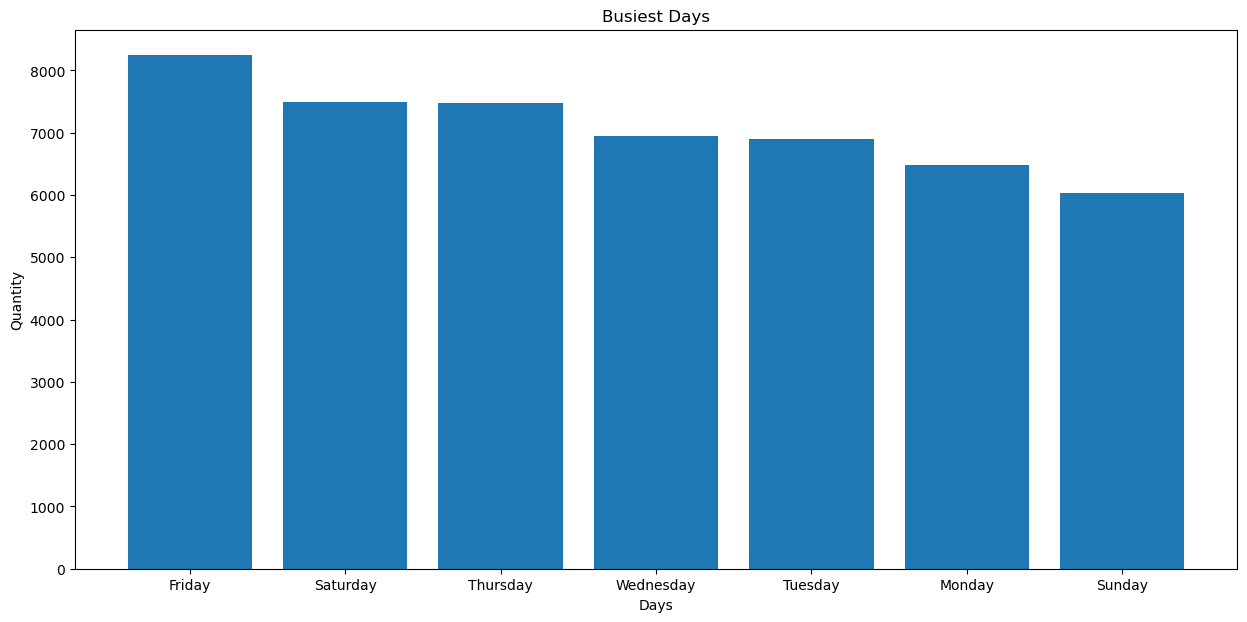

In [45]:
plt.figure(figsize=(15,7))
plt.bar(days_df['day'],days_df['quantity'])
plt.xlabel('Days')
plt.ylabel('Quantity')
plt.title('Busiest Days',fontsize=12)
plt.savefig('busy.jpg')

## Which day did we make more money?

In [46]:
sale_df = pd.DataFrame(pizza_df.groupby('day')['sales'].sum().sort_values(ascending=False)).reset_index()

sale_df['sale_pct']= round(sale_df['sales']/sale_df['sales'].sum()*100,2)
sale_df

,day,sales,sale_pct
0,Friday,136073.90,16.64
1,Thursday,123528.50,15.10
2,Saturday,123182.40,15.06
3,Wednesday,114408.40,13.99
4,Tuesday,114133.80,13.96
5,Monday,107329.55,13.12
6,Sunday,99203.50,12.13


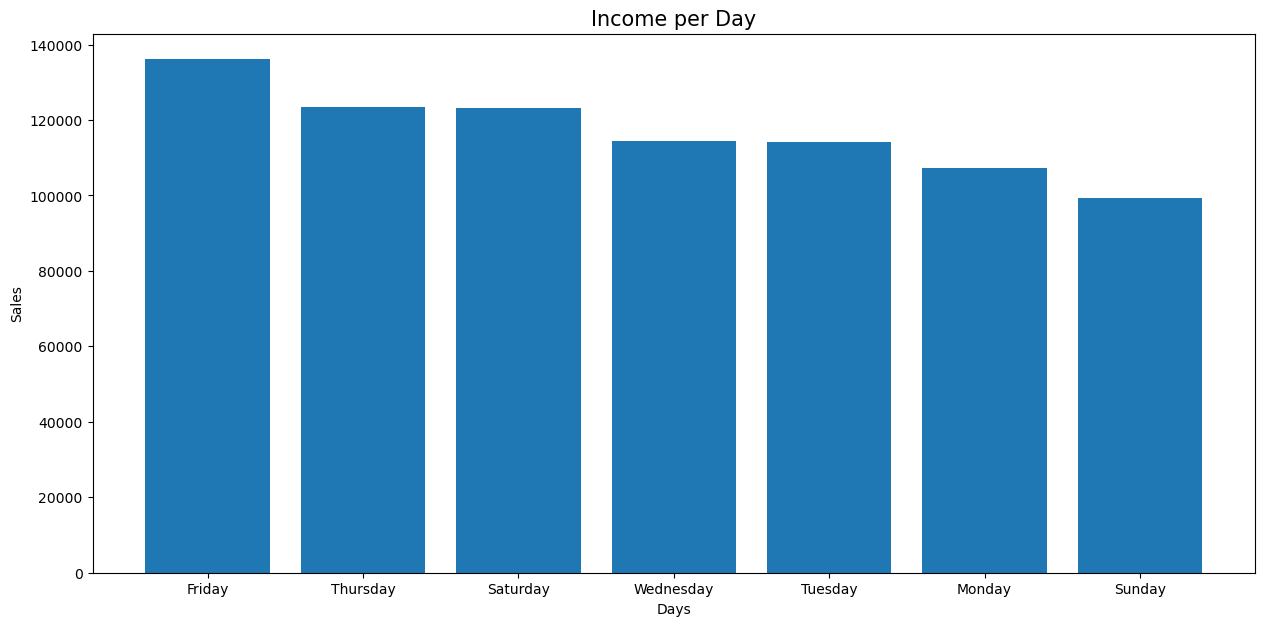

In [47]:
plt.figure(figsize=(15,7))
plt.bar(sale_df['day'],sale_df['sales'])
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Income per Day',fontsize=15)
plt.savefig('income.jpg')

How many different pizzas do we sell?
top 3 selling pizzas
worst selling pizzas

In [48]:
diff_pizzas = pizza_df['name'].nunique()

In [49]:
print(f'There are {diff_pizzas} types of pizzas')

There are 32 types of pizzas


In [50]:
pizza1_df = pd.DataFrame(pizza_df.groupby('name')['quantity'].sum().sort_values(ascending=False)).reset_index()

In [51]:
pizza1_df.head(3)   #shows top 3 selling pizzas

,name,quantity
0,The Classic Deluxe Pizza,2453
1,The Barbecue Chicken Pizza,2432
2,The Hawaiian Pizza,2422


In [52]:
pizza1_df.tail(3)   #shows worst 3 selling pizzas

,name,quantity
29,The Calabrese Pizza,937
30,The Mediterranean Pizza,934
31,The Brie Carre Pizza,490


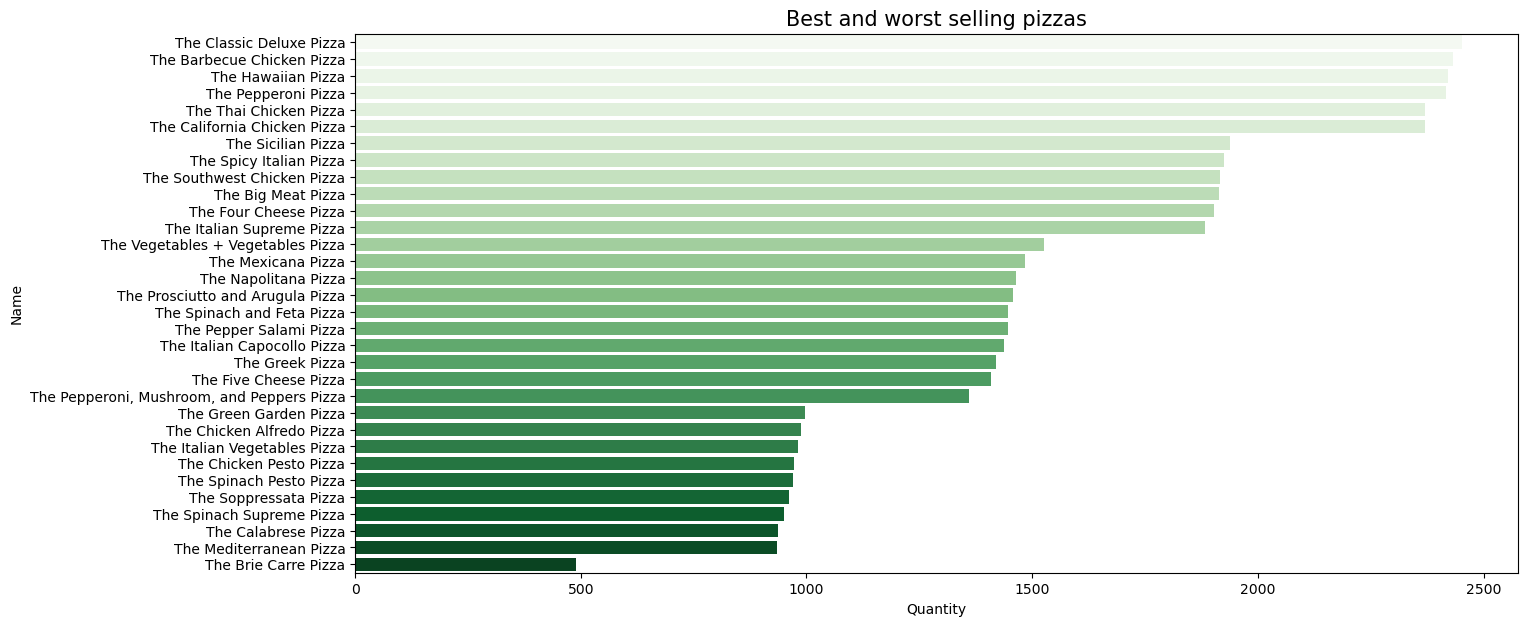

In [53]:
plt.figure(figsize=(15,7))
sns.barplot(data=pizza1_df,x='quantity',y='name',orient='h',palette='Greens')   #orient makes it horizontal and  
plt.xlabel('Quantity')
plt.ylabel('Name')
plt.title('Best and worst selling pizzas',fontsize=15);
plt.savefig('selling1.jpg')

## Top profitable pizzas

In [54]:
pizza2_df = pd.DataFrame(pizza_df.groupby('name')['sales'].sum().sort_values(ascending=False)).reset_index()
pizza2_df['percentage']= round(pizza2_df['sales']/pizza2_df['sales'].sum()*100,2)
pizza2_df.head()

,name,sales,percentage
0,The Thai Chicken Pizza,43434.25,5.31
1,The Barbecue Chicken Pizza,42768.00,5.23
2,The California Chicken Pizza,41409.50,5.06
3,The Classic Deluxe Pizza,38180.50,4.67
4,The Spicy Italian Pizza,34831.25,4.26


In [55]:
print('Best performing')
print('Based on quantities')
print(pizza1_df.head())
print('              ')
print('Based on sales')
print(pizza2_df.head())

Best performing
Based on quantities
                         name  quantity
0    The Classic Deluxe Pizza      2453
1  The Barbecue Chicken Pizza      2432
2          The Hawaiian Pizza      2422
3         The Pepperoni Pizza      2418
4      The Thai Chicken Pizza      2371
              
Based on sales
                           name     sales  percentage
0        The Thai Chicken Pizza  43434.25        5.31
1    The Barbecue Chicken Pizza  42768.00        5.23
2  The California Chicken Pizza  41409.50        5.06
3      The Classic Deluxe Pizza  38180.50        4.67
4       The Spicy Italian Pizza  34831.25        4.26


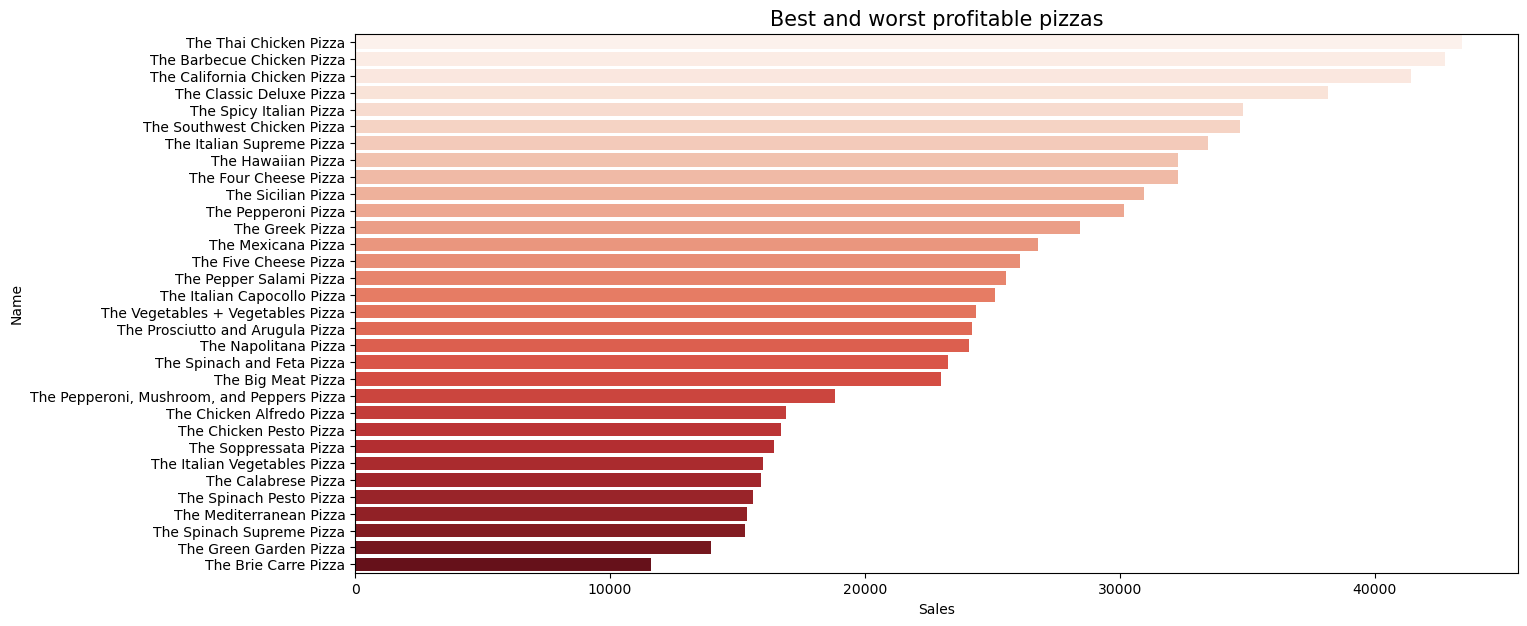

In [56]:
plt.figure(figsize=(15,7))
sns.barplot(data=pizza2_df,x='sales',y='name',orient='h',palette='Reds')   #orient makes it horizontal and  
plt.xlabel('Sales')
plt.ylabel('Name')
plt.title('Best and worst profitable pizzas',fontsize=15);
plt.savefig('profit.jpg')

In [57]:
pizza_df.groupby('name')[['quantity','sales']].sum().reset_index().sort_values(by='sales',ascending=False)

,name,quantity,sales
30,The Thai Chicken Pizza,2371,43434.25
0,The Barbecue Chicken Pizza,2432,42768.00
4,The California Chicken Pizza,2370,41409.50
7,The Classic Deluxe Pizza,2453,38180.50
26,The Spicy Italian Pizza,1924,34831.25
25,The Southwest Chicken Pizza,1917,34705.75
14,The Italian Supreme Pizza,1884,33476.75
12,The Hawaiian Pizza,2422,32273.25
9,The Four Cheese Pizza,1902,32265.70
23,The Sicilian Pizza,1938,30940.50


In [58]:
size_df = pizza_df.groupby('size')[['quantity','sales']].sum().reset_index()
size_df['sale_percent']= round(size_df['sales']/size_df['sales'].sum()*100,2)
size_df

,size,quantity,sales,sale_percent
0,L,18956,375318.70,45.89
1,M,15635,249382.25,30.49
2,S,14403,178076.50,21.77
3,XL,552,14076.00,1.72
4,XXL,28,1006.60,0.12


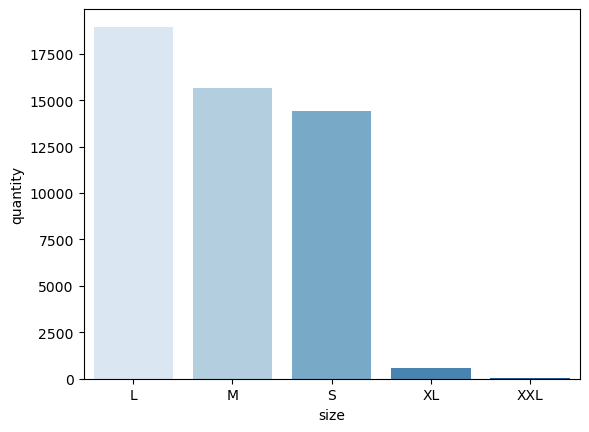

In [59]:
sns.barplot(data=size_df,x='size',y='quantity',palette='Blues')
plt.savefig('size.jpg');

In [60]:
heat = pizza_df.groupby(['day','hour'])['quantity'].sum().unstack('hour')

In [61]:
pizza_df.groupby(['day','hour'])['sales'].sum().unstack('hour')

hour,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,
Friday,NaN,NaN,6449.30,18227.05,17144.55,8583.45,7182.05,9642.15,12622.40,15440.05,12287.05,11659.15,10131.80,6274.20,430.70
Monday,NaN,50.25,7767.00,18596.10,13292.20,7614.80,6868.80,8907.75,11893.70,11044.70,8853.85,5866.25,4638.15,1869.05,66.95
Saturday,NaN,52.75,3335.55,10299.80,13001.15,8646.40,8671.55,10588.10,12107.60,14591.25,13956.25,12031.60,9811.15,5579.30,509.95
Sunday,NaN,37.50,3818.75,9988.80,11452.95,8466.70,8075.85,10092.25,11776.30,11964.25,9435.75,6639.10,5001.35,2384.20,69.75
Thursday,NaN,86.50,7731.65,19042.20,18807.10,9423.10,7594.30,10795.05,14064.55,13335.85,9639.60,7530.50,3537.50,1896.60,44.00
Tuesday,83.0,NaN,7147.05,18364.85,16889.00,8084.65,6922.50,10449.70,10980.50,10403.80,9960.95,7943.85,4470.45,2433.50,NaN
Wednesday,NaN,76.65,8686.50,17359.10,15478.75,8382.30,7677.25,9580.40,12792.40,12516.95,8495.45,6544.95,4439.40,2378.30,NaN


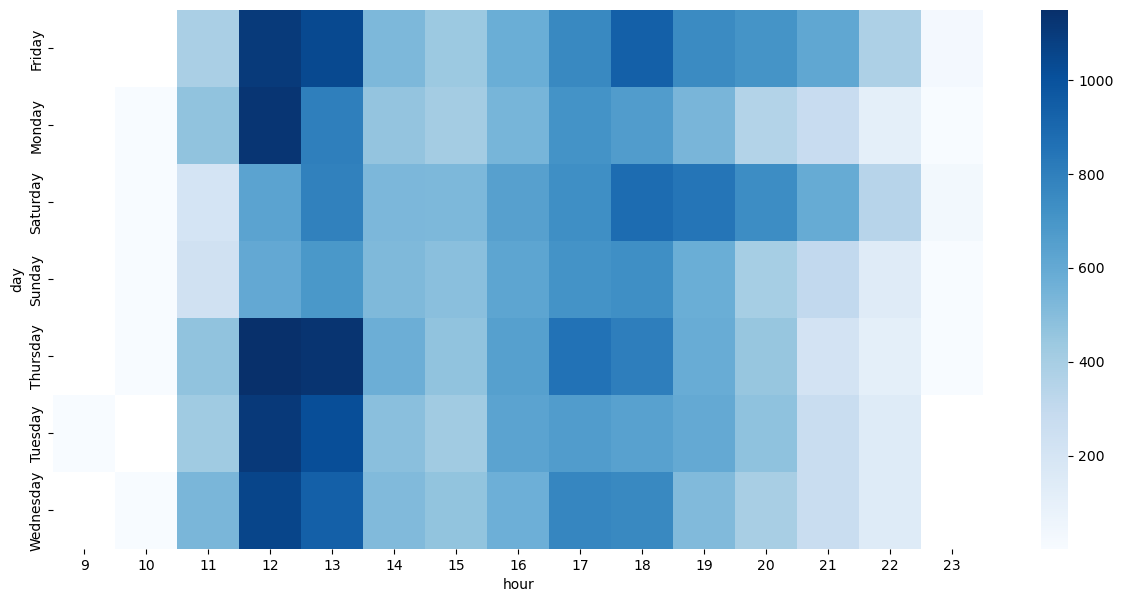

In [62]:
plt.figure(figsize=(15,7))
sns.heatmap(heat,cmap='Blues')
plt.savefig('heat.jpg')